In [1]:
import os
#os.chdir ('C:\\Users\\ゲスト\\Desktop\\All_code_mixed\\AI projectsUsers\\Rock_Paper_Scissor')


In [2]:
pwd

'/Users/abrahamkaligambe/Desktop/solarcell Journal/data'

In [3]:
defective_dir = os.path.join('/Users/abrahamkaligambe/Desktop/solarcell Journal/data/mono/defective')  # combining all folders
#micro_crack_dir = os.path.join('C:\\Users\\ゲスト\\Desktop\\solarcell Images\\data\\mono\\micro_crack')
functional_dir = os.path.join('/Users/abrahamkaligambe/Desktop/solarcell Journal/data/mono/functional')

print('total training defective images:', len(os.listdir(defective_dir)))
#print('total training micro_crack images:', len(os.listdir(micro_crack_dir)))
print('total training functional images:', len(os.listdir(functional_dir)))

defective_files = os.listdir(defective_dir)
print(defective_files[:5])

#micro_crack_files = os.listdir(micro_crack_dir)
#print(micro_crack_files[:5])

functional_files = os.listdir(functional_dir)
print(functional_files[:5])

total training defective images: 100
total training functional images: 100
['cell0037.png', 'cell0022.png', 'cell0432.png', 'cell0383.png', 'cell0395.png']
['cell1498.png', 'cell1499.png', 'cell1289.png', 'cell2409.png', 'cell1100.png']


In [4]:
#%pip install matplotlib

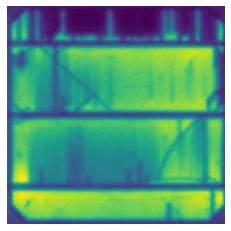

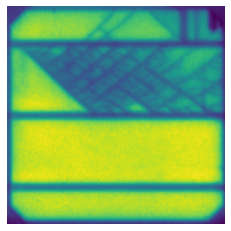

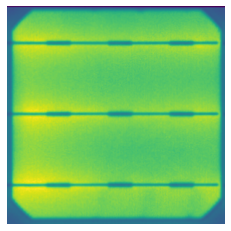

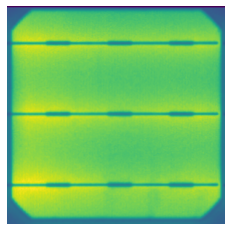

In [5]:
#%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg  # for ploting images

pic_index = 2

next_defective = [os.path.join(defective_dir, fname) 
                for fname in defective_files[pic_index-2:pic_index]]
#next_micro_crack = [os.path.join(micro_crack_dir, fname) 
#                for fname in micro_crack_files[pic_index-2:pic_index]]
next_functional = [os.path.join(functional_dir, fname) 
                for fname in functional_files[pic_index-2:pic_index]]

for i, img_path in enumerate(next_defective+next_functional): #next_micro_crack+
  #print(img_path)
  img = mpimg.imread(img_path)
  plt.imshow(img)
  plt.axis('Off')
  plt.show()

In [6]:
import tensorflow as tf
import keras_preprocessing
from keras_preprocessing import image
from keras_preprocessing.image import ImageDataGenerator

/Users/abrahamkaligambe/opt/anaconda3/envs/tensorflow_1env/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/Users/abrahamkaligambe/opt/anaconda3/envs/tensorflow_1env/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/Users/abrahamkaligambe/opt/anaconda3/envs/tensorflow_1env/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([

### Image augmenations and apply them to training and validation sets

In [7]:
TRAINING_DIR = "/Users/abrahamkaligambe/Desktop/solarcell Journal/data/mono"  # always show full path
training_datagen = ImageDataGenerator(   # Image Augmentation
    
    #featurewise_center = True,
    rescale = 1./255,
    #rotation_range=40,
    #width_shift_range=0.2,
    #height_shift_range=0.2,
    #shear_range=0.15,
    #zoom_range=0.2,
    horizontal_flip=True,
    vertical_flip=True,
    fill_mode='nearest')

VALIDATION_DIR = "/Users/abrahamkaligambe/Desktop/solarcell Journal/data/mono_test_set"
validation_datagen = ImageDataGenerator(rescale = 1./255)  #  validation set is also rescaled

# fit the data augmentation
#training_datagen.fit(TRAINING_DIR)

train_generator = training_datagen.flow_from_directory(  # apply the ImageGenerator to the directory
	TRAINING_DIR,
    batch_size=8,
    shuffle=True,
	target_size=(300,300),
	class_mode='categorical'
)

validation_generator = validation_datagen.flow_from_directory(   ## apply the ImageGenerator to the directory
	VALIDATION_DIR,
	target_size=(300,300),
	class_mode='categorical'
)


Found 200 images belonging to 2 classes.
Found 40 images belonging to 2 classes.


In [9]:

model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 150x150 with 3 bytes color
    # This is the first convolution
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(300, 300, 3)),  # 64 filters with size (3,3)
    tf.keras.layers.MaxPooling2D(2, 2),
    
    # The second convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    # The third convolution
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
     #The fourth convolution
    tf.keras.layers.Conv2D(256, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    # The fifth convolution
    #tf.keras.layers.Conv2D(256, (3,3), activation='relu'),
   # tf.keras.layers.MaxPooling2D(2,2),
    
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.1),  #dropout to reduce overfitting
    
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    #tf.keras.layers.Dense(256, activation='relu'),
    #tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(2, activation='sigmoid')  # 1 because we only have 2 possible outcomes
])


model.summary()

callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=5)   # stop training after 5 epochs if no improvement

model.compile(loss = 'binary_crossentropy', optimizer='adam', metrics=['accuracy']) # try ADAM, rmsprop, sdg

history = model.fit_generator(train_generator, epochs=40, shuffle = True, callbacks=[callback] ,validation_data = validation_generator, verbose = 1)

model.save("mono1.h5")


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 298, 298, 32)      896       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 149, 149, 32)      0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 147, 147, 64)      18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 73, 73, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 71, 71, 128)       73856     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 35, 35, 128)       0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 33, 33, 256)      

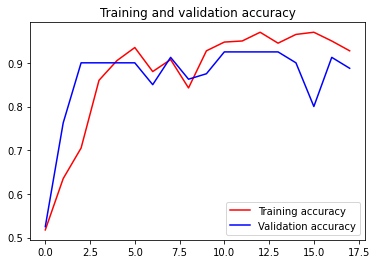

<Figure size 432x288 with 0 Axes>

In [12]:
#import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()


plt.show()